In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

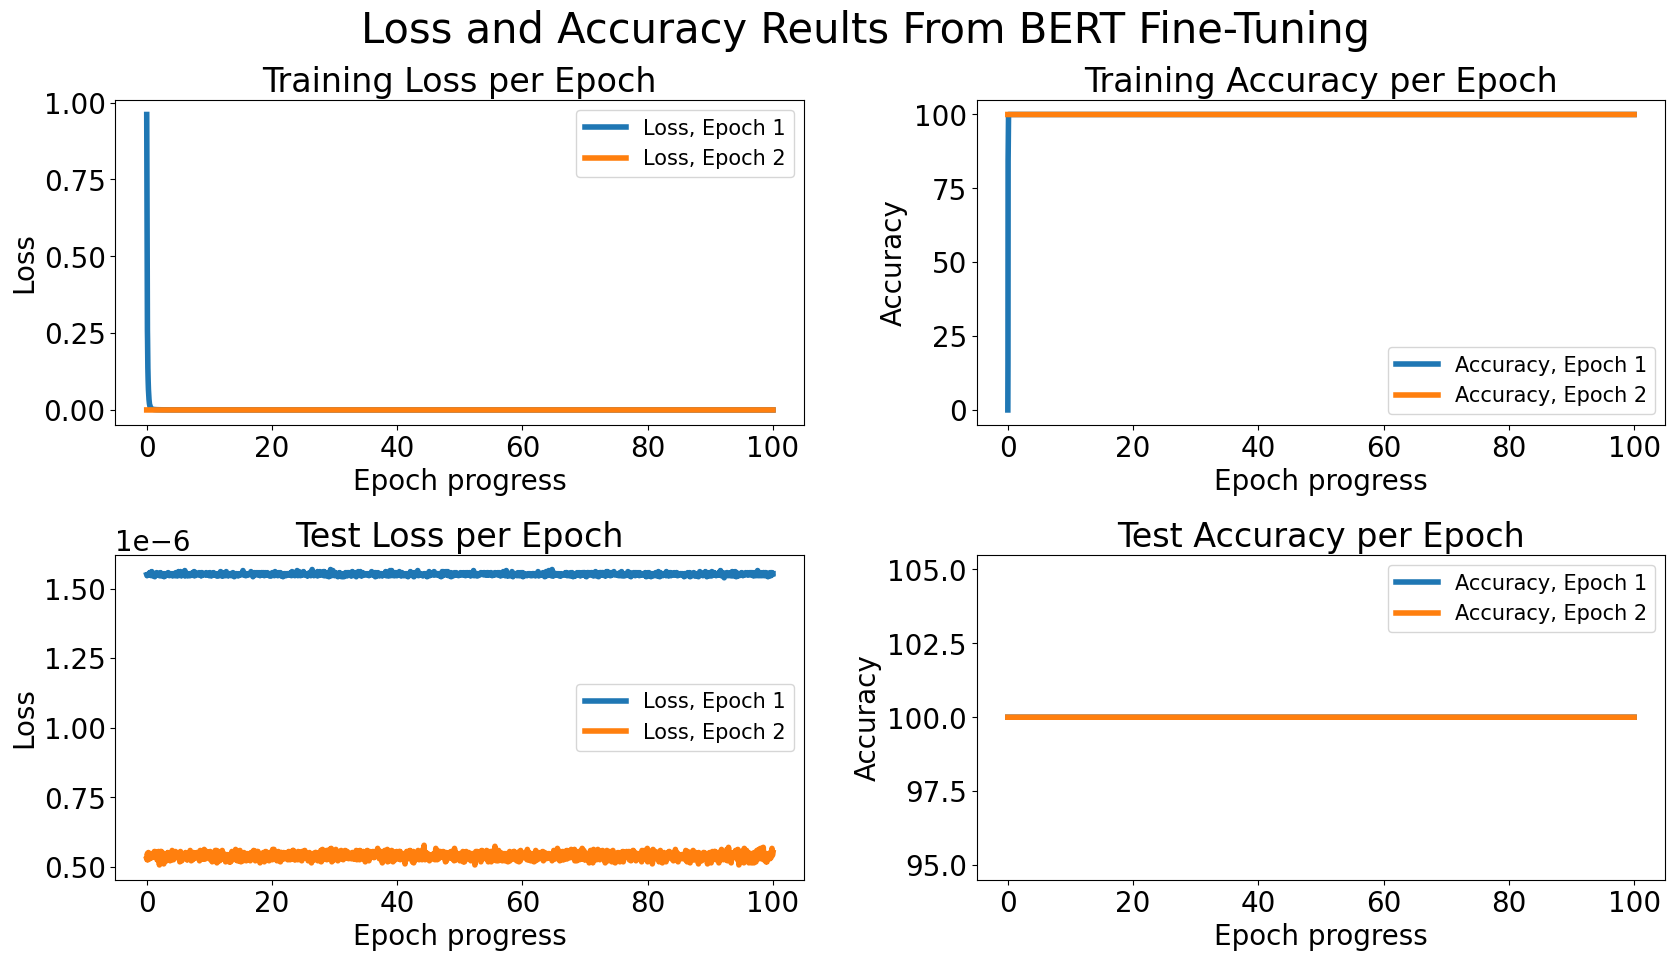

In [30]:
##### The results of the BERT training #####
# The file has num epochs * 4 rows + a header row
# columns are of variable length based on train test split

# open the file
with open('BERT_training_results.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))

# bert was trained with 2 epochs so (2 * 4) = 8 rows to be created as numpy arrays and the first row is ignored
# look in file for this
num_epochs = 2
for i in range(num_epochs * 4):
    data[i + 1] = np.asarray(data[i + 1], dtype=float)

# create graph environment 
plt.rcParams.update({'font.size': 20})
# 1 graph for training and 1 for valiidation (test)
fig, axs = plt.subplots(2, 2, figsize = (20, 10))
fig.suptitle('Loss and Accuracy Reults From BERT Fine-Tuning', fontsize = 30)
plt.rc('lines', linewidth = 4.0)

# Graph the statistics from data
train_batches = data[1].shape[0]
# x axis training progress 
x_train = np.linspace(0, 100, train_batches)
axs[0, 0].plot(x_train, data[1], label = "Loss, Epoch 1")
axs[0, 0].plot(x_train, data[2], label = "Loss, Epoch 2")
axs[0, 0].legend(fontsize="15")
axs[0, 0].set_title("Training Loss per Epoch")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].set_xlabel("Epoch progress")


axs[0, 1].plot(x_train, data[3], label = "Accuracy, Epoch 1")
axs[0, 1].plot(x_train, data[4], label = "Accuracy, Epoch 2")
axs[0, 1].legend(fontsize="15")
axs[0, 1].set_title("Training Accuracy per Epoch")
axs[0, 1].set_ylabel("Accuracy")
axs[0, 1].set_xlabel("Epoch progress")

val_batches = data[1 + (2 * num_epochs)].shape[0]
x_val = np.linspace(0, 100, val_batches)
axs[1, 0].plot(x_val, data[5], label = "Loss, Epoch 1")
axs[1, 0].plot(x_val, data[6], label = "Loss, Epoch 2")
axs[1, 0].legend(fontsize="15")
axs[1, 0].set_title("Test Loss per Epoch")
axs[1, 0].set_ylabel("Loss")
axs[1, 0].set_xlabel("Epoch progress")


axs[1, 1].plot(x_val, data[7], label = "Accuracy, Epoch 1")
axs[1, 1].plot(x_val, data[8], label = "Accuracy, Epoch 2")
axs[1, 1].legend(fontsize="15")
axs[1, 1].set_title("Test Accuracy per Epoch")
axs[1, 1].set_ylabel("Accuracy")
axs[1, 1].set_xlabel("Epoch progress")

plt.subplots_adjust(wspace = 0.25, hspace = 0.4, top = 0.89)
plt.show()